In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 3.2 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sys
import os
import re
import tweepy
from tweepy import OAuthHandler
from datetime import datetime, timedelta
from IPython.display import clear_output
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Login.csv to Login.csv


In [ ]:
log = pd.read_csv('Login.csv')
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accesToken = log['key'][2]
accesTokenSecret = log['key'][3]
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accesToken, accesTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
tweet_lst=[]
search_term = '#StandWithUkraine -filter:retweets'

for tweet in tweepy.Cursor(api.search, q = search_term, lang = 'en', since = '2022-01-01', tweet_mode = 'extended').items(2000):
  tweetDate = tweet.created_at.date()
  tweet_lst.append([tweetDate, tweet.id, tweet.user.screen_name, tweet.user.name, tweet.full_text])

df_tweet = pd.DataFrame(tweet_lst, columns=['tweet_dt', 'id', 'username', 'name', 'tweet'])
df_tweet

,tweet_dt,id,username,name,tweet
0,2022-03-08,1501056873017090050,svitlana_babych,Svitlana Babych,@RepFrankLucas @GOPLeader @SteveScalise @RepSt...
1,2022-03-08,1501056837906571265,LynnPKH,LynnPKH,@CocaCola Please STOP operations in Russia. ST...
2,2022-03-08,1501056818000408578,Bjvanjames,Bjames,@WWE @YaOnlyLivvOnce @RheaRipley_WWE As in rea...
3,2022-03-08,1501056757401108480,thecreepyfish,Creepyfish,To all the heroes of Ukraine. «Going all in» #...
4,2022-03-08,1501056756926988288,thebowrd,An Earthling,@caslernoel You don't really think the Russian...
...,...,...,...,...,...
1995,2022-03-07,1500984268138319872,EstellaBell1,Estella Bell,"Champions League predictions, odds: Expert pic..."
1996,2022-03-07,1500984266573942788,Kyiv74673321,Kyiv,@drivandalism Couldn't we see that as good new...
1997,2022-03-07,1500984244042371072,Yarik_T,Yarik,"Thank you, Australia, you #StandWithUkraine! h..."
1998,2022-03-07,1500984241353633796,enrich1212,enrich12,So many devils around. \n#Trump #Putin #StandW...


In [ ]:
def cleanTwt(twt):
  twt = re.sub(r'@[A-Za-z0-9]+', ' ', twt) #to remove @ mentions
  twt = re.sub(r'#', ' ', twt) #removes the # symbol
  twt = re.sub(r'RT[\s]+', ' ', twt) #removes retweet rt
  twt = re.sub(r'https?:\/\/\S+', ' ', twt) #removes hyperlinks

  return twt


df_tweet['cleaned_tweet'] = df_tweet['tweet'].apply(cleanTwt)
df_tweet

,tweet_dt,id,username,name,tweet,cleaned_tweet
0,2022-03-08,1501056873017090050,svitlana_babych,Svitlana Babych,@RepFrankLucas @GOPLeader @SteveScalise @RepSt...,74% of Americans believe that NATO sho...
1,2022-03-08,1501056837906571265,LynnPKH,LynnPKH,@CocaCola Please STOP operations in Russia. ST...,Please STOP operations in Russia. STOP spons...
2,2022-03-08,1501056818000408578,Bjvanjames,Bjames,@WWE @YaOnlyLivvOnce @RheaRipley_WWE As in rea...,_WWE As in real life!!! 🇷🇼 StandWithUkraine
3,2022-03-08,1501056757401108480,thecreepyfish,Creepyfish,To all the heroes of Ukraine. «Going all in» #...,To all the heroes of Ukraine. «Going all in» ...
4,2022-03-08,1501056756926988288,thebowrd,An Earthling,@caslernoel You don't really think the Russian...,You don't really think the Russians would bu...
...,...,...,...,...,...,...
1995,2022-03-07,1500984268138319872,EstellaBell1,Estella Bell,"Champions League predictions, odds: Expert pic...","Champions League predictions, odds: Expert pic..."
1996,2022-03-07,1500984266573942788,Kyiv74673321,Kyiv,@drivandalism Couldn't we see that as good new...,Couldn't we see that as good news? In view o...
1997,2022-03-07,1500984244042371072,Yarik_T,Yarik,"Thank you, Australia, you #StandWithUkraine! h...","Thank you, Australia, you StandWithUkraine!"
1998,2022-03-07,1500984241353633796,enrich1212,enrich12,So many devils around. \n#Trump #Putin #StandW...,So many devils around. \n Trump Putin StandW...


In [ ]:
def getPolarity(text):
  sid = SentimentIntensityAnalyzer()
  return sid.polarity_scores(text)


df_tweet['tweet_sentiment'] = df_tweet['tweet'].apply(getPolarity)
df_tweet.head()

,tweet_dt,id,username,name,tweet,cleaned_tweet,tweet_sentiment
0,2022-03-08,1501056873017090050,svitlana_babych,Svitlana Babych,@RepFrankLucas @GOPLeader @SteveScalise @RepSt...,74% of Americans believe that NATO sho...,"{'neg': 0.043, 'neu': 0.832, 'pos': 0.125, 'co..."
1,2022-03-08,1501056837906571265,LynnPKH,LynnPKH,@CocaCola Please STOP operations in Russia. ST...,Please STOP operations in Russia. STOP spons...,"{'neg': 0.425, 'neu': 0.503, 'pos': 0.072, 'co..."
2,2022-03-08,1501056818000408578,Bjvanjames,Bjames,@WWE @YaOnlyLivvOnce @RheaRipley_WWE As in rea...,_WWE As in real life!!! 🇷🇼 StandWithUkraine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-03-08,1501056757401108480,thecreepyfish,Creepyfish,To all the heroes of Ukraine. «Going all in» #...,To all the heroes of Ukraine. «Going all in» ...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp..."
4,2022-03-08,1501056756926988288,thebowrd,An Earthling,@caslernoel You don't really think the Russian...,You don't really think the Russians would bu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
df_tweet['compound'] = df_tweet['tweet_sentiment'].apply(lambda score_dict: score_dict['compound'])
df_tweet['sentiment_type']=''
df_tweet.loc[df_tweet.compound>0,'sentiment_type']='POSITIVE'
df_tweet.loc[df_tweet.compound==0,'sentiment_type']='NEUTRAL'
df_tweet.loc[df_tweet.compound<0,'sentiment_type']='NEGATIVE'
df_tweet

,tweet_dt,id,username,name,tweet,cleaned_tweet,tweet_sentiment,compound,sentiment_type
0,2022-03-08,1501056873017090050,svitlana_babych,Svitlana Babych,@RepFrankLucas @GOPLeader @SteveScalise @RepSt...,74% of Americans believe that NATO sho...,"{'neg': 0.043, 'neu': 0.832, 'pos': 0.125, 'co...",0.3964,POSITIVE
1,2022-03-08,1501056837906571265,LynnPKH,LynnPKH,@CocaCola Please STOP operations in Russia. ST...,Please STOP operations in Russia. STOP spons...,"{'neg': 0.425, 'neu': 0.503, 'pos': 0.072, 'co...",-0.9042,NEGATIVE
2,2022-03-08,1501056818000408578,Bjvanjames,Bjames,@WWE @YaOnlyLivvOnce @RheaRipley_WWE As in rea...,_WWE As in real life!!! 🇷🇼 StandWithUkraine,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3,2022-03-08,1501056757401108480,thecreepyfish,Creepyfish,To all the heroes of Ukraine. «Going all in» #...,To all the heroes of Ukraine. «Going all in» ...,"{'neg': 0.0, 'neu': 0.852, 'pos': 0.148, 'comp...",0.5106,POSITIVE
4,2022-03-08,1501056756926988288,thebowrd,An Earthling,@caslernoel You don't really think the Russian...,You don't really think the Russians would bu...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
...,...,...,...,...,...,...,...,...,...
1995,2022-03-07,1500984268138319872,EstellaBell1,Estella Bell,"Champions League predictions, odds: Expert pic...","Champions League predictions, odds: Expert pic...","{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.7783,POSITIVE
1996,2022-03-07,1500984266573942788,Kyiv74673321,Kyiv,@drivandalism Couldn't we see that as good new...,Couldn't we see that as good news? In view o...,"{'neg': 0.136, 'neu': 0.745, 'pos': 0.119, 'co...",-0.2691,NEGATIVE
1997,2022-03-07,1500984244042371072,Yarik_T,Yarik,"Thank you, Australia, you #StandWithUkraine! h...","Thank you, Australia, you StandWithUkraine!","{'neg': 0.0, 'neu': 0.642, 'pos': 0.358, 'comp...",0.4199,POSITIVE
1998,2022-03-07,1500984241353633796,enrich1212,enrich12,So many devils around. \n#Trump #Putin #StandW...,So many devils around. \n Trump Putin StandW...,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",-0.6096,NEGATIVE


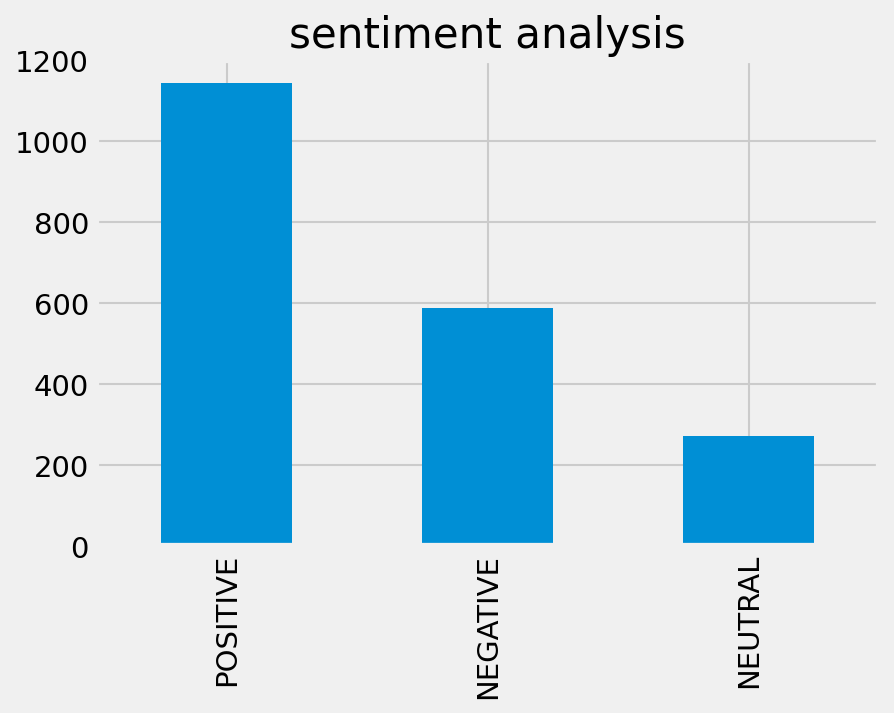

In [ ]:
df_tweet.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")

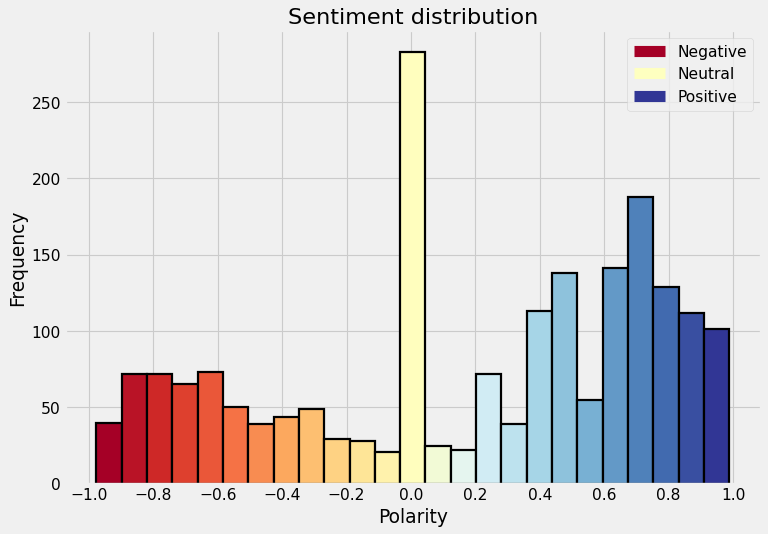

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10, 7), dpi= 80)
cm = plt.cm.get_cmap('RdYlBu')
n, bins, patches = plt.hist(df_tweet['compound'], 25, edgecolor='black', linewidth=2)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

plt.title('Sentiment distribution')
plt.xlabel('Polarity')
plt.xticks(np.arange(-1.0, 1.1, step=0.2))
plt.ylabel('Frequency')

custom_lines = [Line2D([0], [0], color=cm(0.), lw=10),
                Line2D([0], [0], color=cm(.5), lw=10),
                Line2D([0], [0], color=cm(1.), lw=10)]

plt.legend(custom_lines, ['Negative', 'Neutral', 'Positive'])
plt.show()

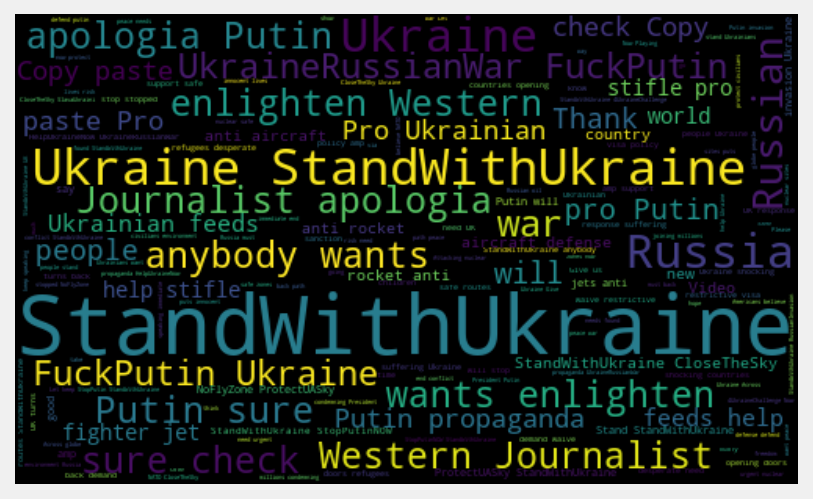

In [ ]:
allWords = ' '.join([twts for twts in df_tweet['cleaned_tweet']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)
plt.rcParams["figure.dpi"] = (150)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()